In [10]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Обобщени полиноми. Интерполиране с обобщени полиноми.

### Задача 1

В таблицата са дадени данни за развитието на бактериална популация

|  t, h  |  1 | 2 | 3 | 4 | 5 |
| --- | --- | --- | --- | --- | --- | 
| бр. клетки (x1000)|  1 |12| 110 | 1037 | 12218 |

Да се намери подходяща функция, която интерполира данните.

In [4]:
t = np.array([1, 2, 3, 4, 5])
cells = np.array([1, 12, 110, 1037, 12218])
A = np.zeros([5,5])
for i in range (5):
    for j in range (5):
        A[i,j] = np.exp(j * t[i])

sol = np.linalg.solve(A, cells)
print(sol)

[ 1.05060273e-01 -3.82376156e-01  2.57280204e-01  1.65052200e-03
  2.49829522e-06]


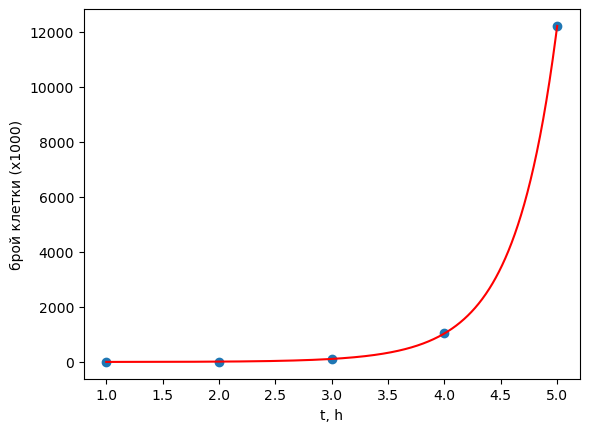

In [7]:
def exp_poly_1(x):
    poly = 0;
    for i in range(cells.size):
        poly += sol[i] * np.exp(i * x)
    return poly

x_axis = np.linspace(1, 5, 1000)
plt.plot(x_axis, exp_poly_1(x_axis), color = 'r')
plt.scatter(t, cells)
plt.xlabel('t, h')
plt.ylabel('брой клетки (x1000)')
plt.show()

### Задача 2

В таблицата са дадени данни за зависимостта между нивото на алкохол в кръвта (BAC - Blood Alcohol Level) и относителния риск за попадане в ПТП (т.е. колко пъти се увеличава рискът спрямо водач, който не е употребявал алкохол)

|  BAC  |  0 | 0.03 | 0.07 | 0.15 | 0.21 | 0.27 |
| --- | --- | --- | --- | --- | --- | --- |
| relative risk of crashing|  1 |1.06| 2.09 | 22.1 | 99.78 | 328.602 |

Да се построи интерполационен полином по подходящ базис, който описва данните от таблицата. Да се начертае графиката му, заедно с данните от таблицата.

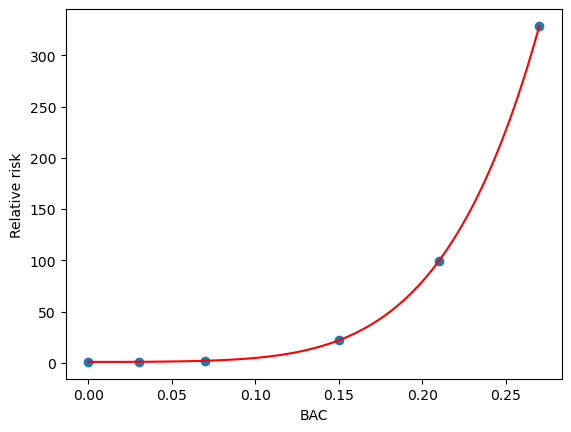

In [11]:
bac = np.array([0, 0.03, 0.07, 0.15, 0.21, 0.27])
rrc = np.array([ 1, 1.06, 2.09, 22.1, 99.78, 328.602])
A = np.zeros([6, 6])
for i in range (6):
    for j in range (6):
        A[i,j] = np.exp(j * bac[i])

sol_2 = np.linalg.solve(A, rrc)

def exp_poly_2(x):
    poly = 0
    for i in range(rrc.size):
        poly += sol_2[i] * np.exp(i * x)
    return poly

x_axis_2 = np.linspace(0, 0.27, 1000)
plt.plot(x_axis_2, exp_poly_2(x_axis_2), color = 'r')
plt.scatter(bac, rrc)
plt.xlabel('BAC')
plt.ylabel('Relative risk')
plt.show()

### Задача 3

Да се докаже, че $\{x^{2k+1}\}_{k=0}^n$ образуват Чебишова система в произволен интервал $[\alpha, \beta], 0 < \alpha < \beta$.

### Задача 4

Да се докаже, че $\{1, \cos x\}$ образуват Чебишова система в интервала $[0, \pi)$, но не образуват в $[0, 2\pi)$.

### Задача 5

In [6]:
t = np.array([0, 1.5, 3, 4, 6])
acceleration = np.array([0, 1, 1.5, 4, 2])
A = np.ones([5, 5])
for i in range(5):
    for j in range(1, 5):
        if(j % 2 != 0):
            A[i, j] = np.cos((math.floor(j / 2) + 1) * t[i])
        else:
            A[i, j] = np.sin(j / 2 * t[i])

sol = np.linalg.solve(A, acceleration)
print(sol)

[ 2.51827865 -0.71350272 -3.04121566 -1.80477593 -1.56550947]


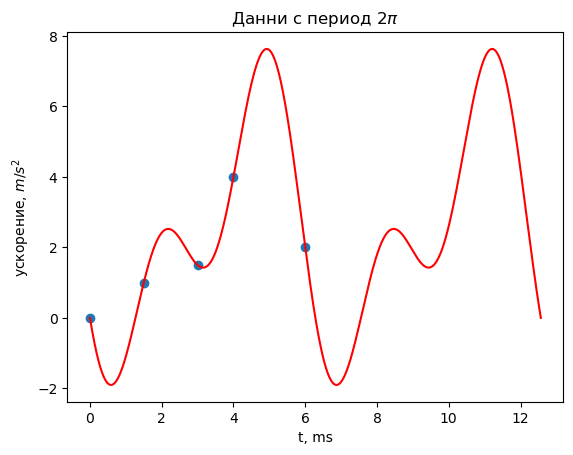

In [8]:
def trig_poly_1(x):
    return sol[0] + sol[1] * np.cos(x) + sol[2] * np.sin(x) + sol[3] * np.cos(2 * x) + sol[4] * np.sin(2 * x)

x_axis = np.linspace(0, 4 * np.pi, 1000)
plt.plot(x_axis, trig_poly_1(x_axis), color = 'r')
plt.scatter(t, acceleration)
plt.title("Данни с период $2 \pi$")
plt.xlabel('t, ms')
plt.ylabel('ускорение, $m/s^2$')
plt.show()

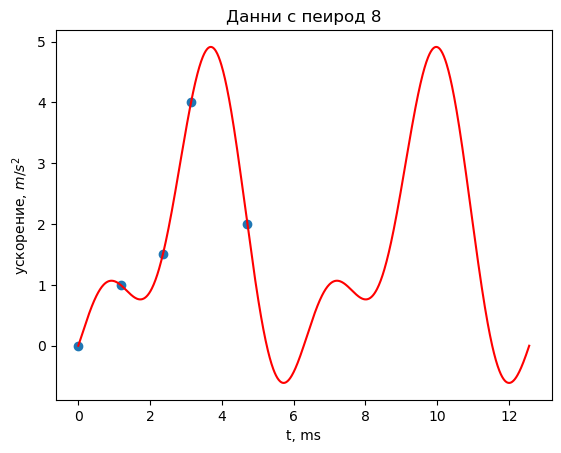

In [18]:
# construct trigonometric polynomial using the same data but with period 8
t_changed = (2 * np.pi) / 8 * t

A = np.ones([5, 5])
for i in range (5):
    for j in range (1, 5):
        if(j % 2 != 0):
            A[i, j] = np.cos((math.floor(j / 2) + 1) * t_changed[i])
        else:
            A[i, j] = np.sin(j / 2 * t_changed[i])


sol = np.linalg.solve(A, acceleration)

def trig_poly_1(x):
    return sol[0] + sol[1] * np.cos(x) + sol[2] * np.sin(x) + sol[3] * np.cos(2 * x) + sol[4] * np.sin(2 * x)

x_axis = np.linspace(0, 4 * np.pi, 1000)
plt.plot(x_axis, trig_poly_1(x_axis), color = 'r')
plt.scatter(t_changed, acceleration)
plt.title("Данни с пеирод 8")
plt.xlabel('t, ms')
plt.ylabel('ускорение, $m/s^2$')
plt.show()

### Задача 6

В таблицата са дадени данни за средните месечни количества слънчева радиация на територията на България, като лиспват данни за м. август

|  t, месец  |  Я | Ф | М | А | М | Ю | Ю | A | С | O | Н | Д |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| слънчева радиация, $W/m^2$|45.9| 78.2 | 123.5| 172.6| 223.5| 255.3| 286.0| | 183.9| 116.2 | 57.8| 37.7|

Данните са осреднени на 30 дни, т.е. можем да считаме, че разстоянието между измерванията в два съседни месеца е 30. Като се има предвид това, както и факта, че разглежданият процес е с период 365 дни, да се намери обобщен полином по подходящ базис, който описва данните в таблицата. Като се използва така намерения полином, да се пресметне приближено количеството слънчева радиация, съответстващо на м. август. Да се сравни с действителната стойност - $257.9 W/m^2$.

In [21]:
days_with_aug = np.arange(0, 12 * 30, 30)
days = np.delete(days_with_aug, 7)
radiation = np.array([45.9, 78.2, 123.5, 172.6, 223.5, 255.3, 286.0, 183.9, 116.2, 57.8, 37.7])
days_changed = (2 * np.pi) / 365 * days

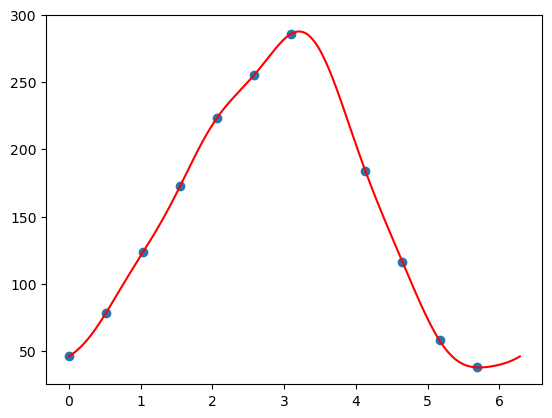

In [22]:

A = np.ones([11, 11])
for i in range (11):
    for j in range (1, 11):
        if(j % 2 != 0):
            A[i, j] = np.cos((math.floor(j / 2) + 1) * days_changed[i])
        else:
            A[i, j] = np.sin(j / 2 * days_changed[i])


sol = np.linalg.solve(A, radiation)

def trig_poly_2(x, sol):
    poly = sol[0]
    for i in range(1, sol.size):
        if(i % 2 != 0):
            poly += sol[i] * np.cos((math.floor(i / 2) + 1) * x)
        else:
            poly += sol[i] * np.sin(i / 2 * x)
    return poly

x_axis = np.linspace(0, 2 * np.pi, 1000)
plt.plot(x_axis, trig_poly_2(x_axis, sol), color = 'r')
plt.scatter(days_changed, radiation)
plt.show()

In [23]:
trig_poly_2((2 * np.pi) / 365 * 210, sol)

260.79356396914744